In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

In [2]:
## Robot parameters
L = 2
W = 3
R = 0.25 # Wheel radius (m)
## Simulation Parameters
dt = 0.5 # step size
ts = 10 # simulation time
t=np.arange(0,ts,dt)
thresh = 0.000001 #threshold for jackobian to zero values this close to zero

In [3]:
## Initial conditions
x0 = 0 # x position
y0 = 0 # y position 
theta0 = np.pi/2 # orientation

In [4]:
eta0 = np.matrix([[x0],[y0],[theta0]]) # initial conditions of states [x, y, theta]^T
eta = np.matrix(np.empty((3,1)))
eta[:,0] = eta0
#eta(:,1) = eta0 # create eta matrix

In [5]:
print(eta)
print(eta[2,0])

[[0.        ]
 [0.        ]
 [1.57079633]]
1.5707963267948966


In [6]:
zeta = np.matrix(np.empty((3,1)))
## Simulation loop
for i in range(len(t)):
    theta = eta[2,i] # current orientation in radians
    
    # R = np.matrix(  [[np.cos(theta), -1*np.sin(theta),  0],
    #                 [np.sin(theta), np.cos(theta),  0],
    #                 [0,           0,           1]])
    
    A = np.matrix(  [[-1, 1, -1, 1],
                    [1, 1, 1, 1],
                    [1/(L+W), -1/(L+W), -1/(L+W), 1/(L+W)]])
    
    dir = 'diagfr'
    vel = 5 #wheel speed [rad/s]

    if dir == 'fwd': #forward
            phi_dot = np.matrix([[vel], [vel], [vel], [vel]]) # wheel angular velocity matrix
    elif dir == 'bwd': #backward
            phi_dot = np.matrix([[-vel], [-vel], [-vel], [-vel]]) # wheel angular velocity matrix
    elif dir == 'left': #strafe left
            phi_dot = np.matrix([[vel], [-vel], [vel], [-vel]]) # wheel angular velocity matrix
    elif dir == 'right': #strafe right
            phi_dot = np.matrix([[-vel], [vel], [-vel], [vel]]) # wheel angular velocity matrix
    elif dir == 'diagfl': #diagonal forward left
            phi_dot = np.matrix([[vel], [0], [vel], [0]]) # wheel angular velocity matrix
    elif dir == 'diagfr': #diagonal forward right
            phi_dot = np.matrix([[0], [vel], [0], [vel]]) # wheel angular velocity matrix
    elif dir == 'diagbl': #diagonal back left
            phi_dot = np.matrix([[0], [-vel], [0], [-vel]]) # wheel angular velocity matrix
    elif dir == 'diagbr': #diagonal back right
            phi_dot = np.matrix([[-vel], [0], [-vel], [0]]) # wheel angular velocity matrix
    elif dir == 'rot_ccw': #rotate ccw
            phi_dot = np.matrix([[vel], [-vel], [-vel], [vel]]) # wheel angular velocity matrix
    elif dir == 'rot_cw': #rotate ccw
            phi_dot = np.matrix([[-vel], [vel], [vel], [-vel]]) # wheel angular velocity matrix


    zeta = np.c_[zeta, np.matrix(np.empty((3,1)))]
    zeta[:,i] = R * A * phi_dot
    #temp = (R/4) * A * phi
    
    #zeta = np.c_[zeta, temp]

    x = np.where(np.logical_and(zeta>-thresh, zeta<0))
    zeta[x] = 0

    x = np.where(np.logical_and(zeta>0, zeta<thresh))
    zeta[x] = 0
    
    
    #position update with euler method
    #print(eta[:,i])
    #print(dt * zeta[:,i])

    eta = np.c_[eta, np.matrix(np.empty((3,1)))]
    eta[:,i+1] = eta[:,i] + (dt * zeta[:,i]) # update state matrix (states = time step * states_dot)
    
    #temp = eta[:,i] + (dt * zeta[:,i]) # update state matrix (states = time step * states_dot)
    #eta = np.c_[eta, temp]

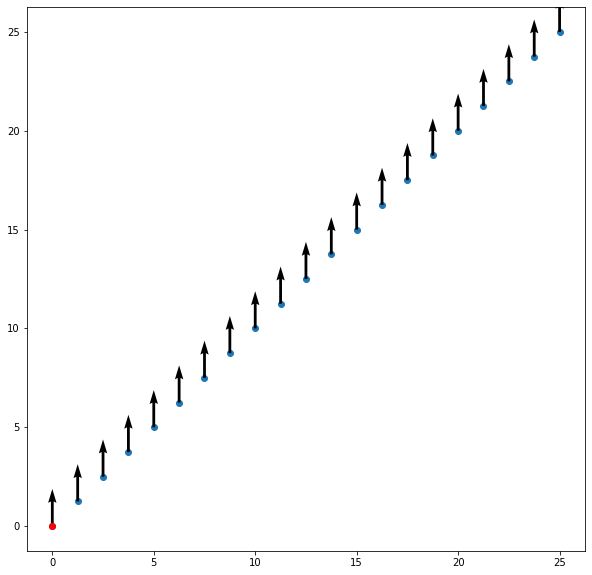

In [7]:
plt.figure(figsize = (10,10))
X = np.asarray(eta[0,:])
Y = np.asarray(eta[1,:])
THETA = np.asarray(eta[2,:])
U = np.cos(THETA)
V = np.sin(THETA)
plt.scatter(np.array(eta[0,:]),np.array(eta[1,:]))
plt.quiver(X,Y,U,V,scale=15,width=0.005)
plt.scatter(0,0, c='red')
plt.show()